En este archivo realizo el EDA de cada csv creado por moneda, trayendome el DF que contiene, fechas desde enero del 2020 hasta la actualidad, precio de cierre, capitalizacion de mercado y volumen del mercado (la cantidad de una criptomoneda que se ha comprado y vendido en todos los intercambios en el dia)

## TETHER
Tether es una criptomoneda estable vinculada al dólar estadounidense. Se utiliza como refugio de valor en momentos de volatilidad y facilita el comercio en exchanges al proporcionar estabilidad de precio.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import time as t
import plotly.graph_objects as go
sns.set()


In [2]:
tet= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\tp2\Proyecto2_Data_Analytics\ETL\tether.csv')

In [3]:
tet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECHAS          1327 non-null   object 
 1   PRECIO-usd      1327 non-null   float64
 2   MARKET_CAP-usd  1327 non-null   float64
 3   TOTAL_VOLUMES   1327 non-null   float64
 4   COIN_ID         1327 non-null   object 
dtypes: float64(3), object(2)
memory usage: 52.0+ KB


In [4]:
tet.describe()

,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES
count,1327.000000,1.327000e+03,1.327000e+03
mean,1.000638,5.202456e+10,5.512684e+10
std,0.002126,2.848874e+10,4.819880e+10
min,0.981837,4.231722e+09,6.894278e+09
25%,0.999774,1.902213e+10,3.165793e+10
50%,1.000448,6.599702e+10,4.675076e+10
75%,1.001364,7.480996e+10,6.493787e+10
max,1.012290,8.389507e+10,9.267677e+11


In [5]:
tet['FECHAS']=pd.to_datetime(tet['FECHAS'])

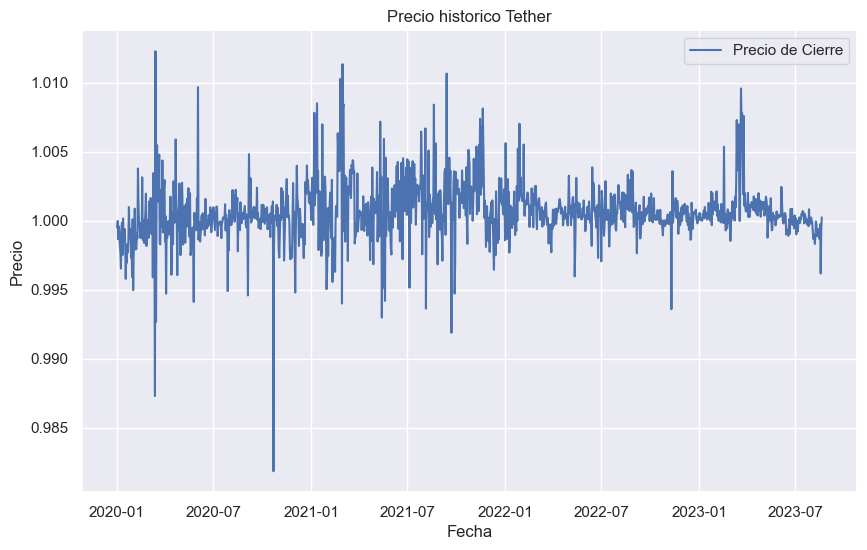

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(tet['FECHAS'], tet['PRECIO-usd'], label='Precio de Cierre')
plt.title('Precio historico Tether')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

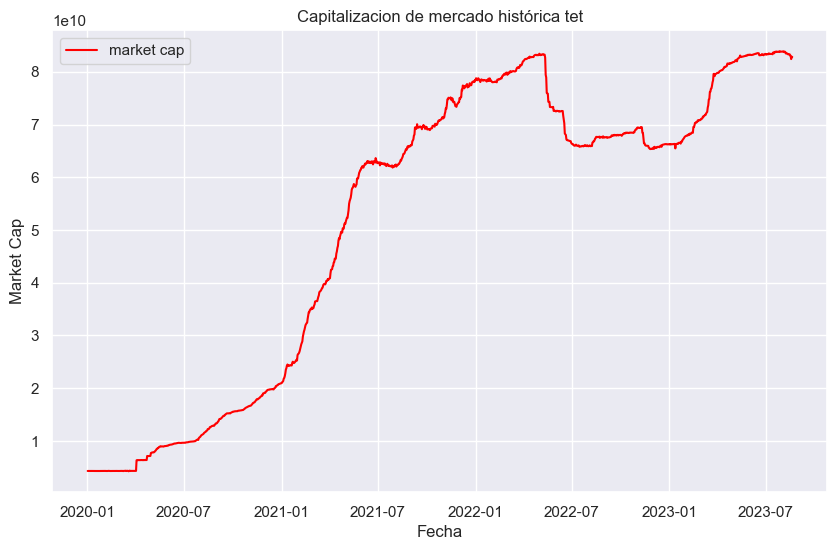

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(tet['FECHAS'], tet['MARKET_CAP-usd'], label='market cap', color='red')
plt.title('Capitalizacion de mercado histórica tet')
plt.xlabel('Fecha')
plt.ylabel('Market Cap')
plt.legend()
plt.grid(True)
plt.show()

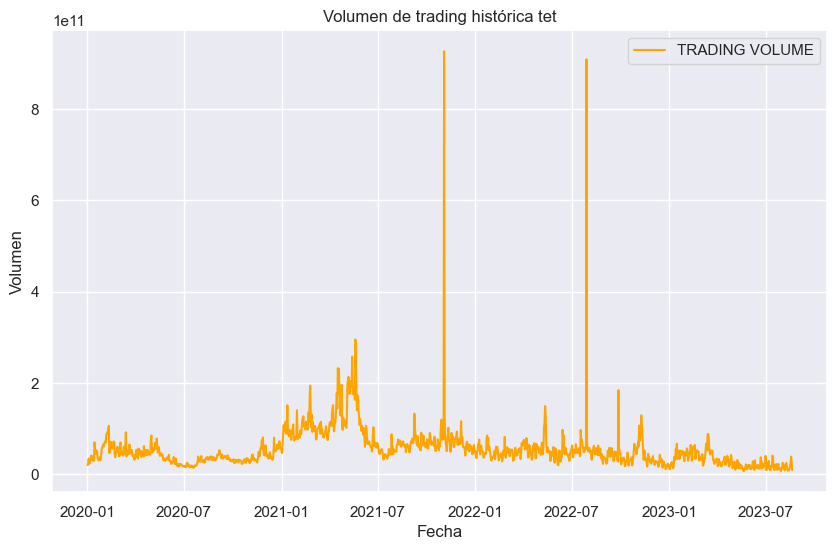

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(tet['FECHAS'], tet['TOTAL_VOLUMES'], label='TRADING VOLUME', color='orange')
plt.title('Volumen de trading histórica tet')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
from ta.momentum import RSIIndicator

# Calcular RSI
rsi_period = 14  # Período típico para RSI
indicator = RSIIndicator(tet['PRECIO-usd'], window=rsi_period)
tet['RSI'] = indicator.rsi()

tet.tail()

,FECHAS,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES,COIN_ID,RSI
1322,2023-08-16,0.998893,8.308914e+10,1.874669e+10,tether,44.978780
1323,2023-08-17,0.999750,8.306115e+10,2.316023e+10,tether,52.633773
1324,2023-08-18,0.996174,8.240478e+10,3.901929e+10,tether,32.382680
1325,2023-08-19,0.999381,8.284635e+10,2.847330e+10,tether,50.700317
1326,2023-08-20,1.000243,8.282739e+10,9.788598e+09,tether,54.287333


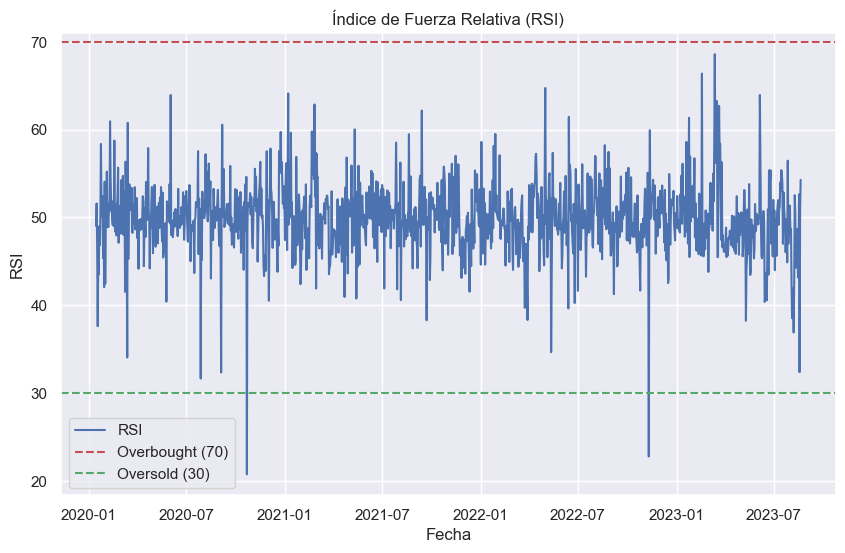

In [10]:
import matplotlib.pyplot as plt

# Graficar el RSI
plt.figure(figsize=(10, 6))
plt.plot(tet['FECHAS'], tet['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('Índice de Fuerza Relativa (RSI)')
plt.xlabel('Fecha')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
rolling_window = 50
tet['MovingAverage'] = tet['PRECIO-usd'].rolling(window=rolling_window).mean()

print(tet.head())

      FECHAS  PRECIO-usd  MARKET_CAP-usd  TOTAL_VOLUMES COIN_ID  RSI  \
0 2020-01-02    0.999508    4.286266e+09   2.051133e+10  tether  NaN   
1 2020-01-03    0.999983    4.288899e+09   2.278512e+10  tether  NaN   
2 2020-01-04    0.998661    4.283023e+09   3.435977e+10  tether  NaN   
3 2020-01-05    0.999595    4.287221e+09   2.324231e+10  tether  NaN   
4 2020-01-06    0.999073    4.281392e+09   2.549920e+10  tether  NaN   

   MovingAverage  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


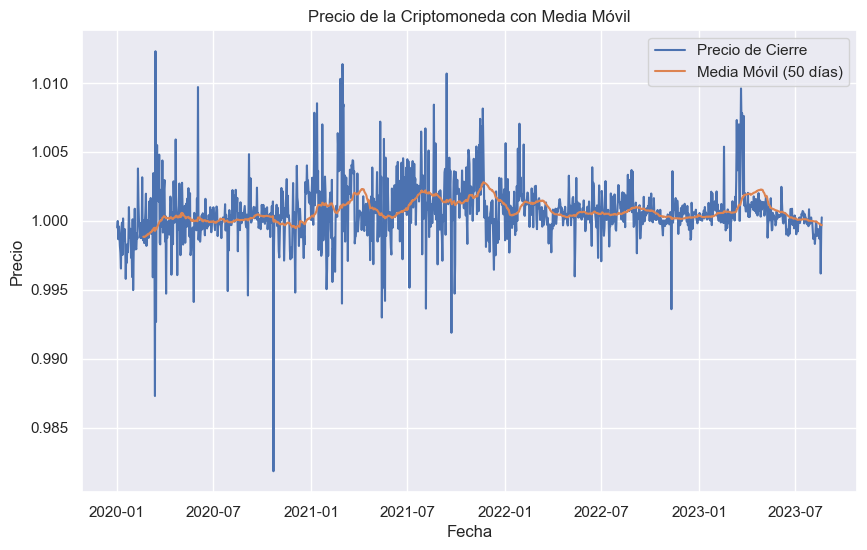

In [12]:
# Graficar los datos y la media móvil
plt.figure(figsize=(10, 6))
plt.plot(tet['FECHAS'], tet['PRECIO-usd'], label='Precio de Cierre')
plt.plot(tet['FECHAS'], tet['MovingAverage'], label=f'Media Móvil ({rolling_window} días)')
plt.title('Precio de la Criptomoneda con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
tet.to_csv('tetherDB.csv', index=False)